### LOADING LIBRARIES

In [1]:
import os
import numpy as np
from PIL import Image # if ImportError -> Install PIL library by using --> !pip install Pillow 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

2023-04-12 10:42:53.378057: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### LOAD DATASET

In [2]:
from PIL import Image

# Open image file
img_path = "./dataset/archive/glioma/709.jpg"
img = Image.open(img_path)

# Get image dimensions
width, height = img.size
print(f"Image dimensions: {width} x {height}")

# This code will open the JPG image located at ./dataset/archive/glioma/709.jpg, 
# display the image, and print its dimensions. 
# You can use Pillow to perform various image manipulations such as resizing, cropping, and converting between different image formats

Image dimensions: 512 x 512


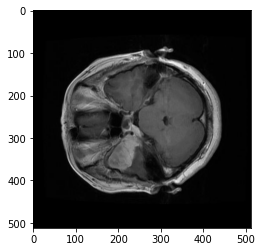

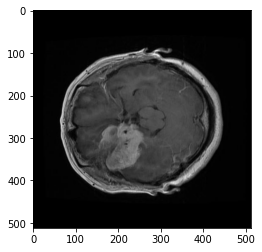

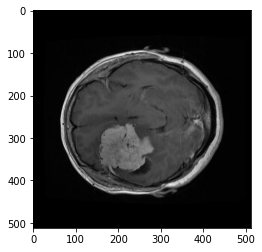

In [3]:
# Display image
for i in range(1,4): 
    img_path = f"./dataset/archive/meningioma/{i}.jpg"
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()

### LOADING ALL THE CLASSES

In [4]:
import numpy as np
from PIL import Image

x = np.zeros((3064, 512, 512), dtype=np.float32)
y = np.zeros((3064), dtype=np.float32)

# Load images from the meningioma dataset
for i in range(1, 709):
    path = f"./dataset/archive/meningioma/{i}.jpg"
    img = Image.open(path)
    # Convert the image to grayscale
    img = img.convert('L')
    # Resize the image to (512, 512)
    img = img.resize((512, 512))
    # Convert the image to a numpy array
    mat = np.array(img)
    y[i-1] = 0 # Set label for meningioma
    x[i-1] = mat

# Load images from the glioma dataset
for i in range(709, 2135):
    path = f"./dataset/archive/glioma/{i}.jpg"
    img = Image.open(path)
    # Convert the image to grayscale
    img = img.convert('L')
    # Resize the image to (512, 512)
    img = img.resize((512, 512))
    # Convert the image to a numpy array
    mat = np.array(img)
    y[(i-1)%1426] = 1 # Set label for glioma
    x[(i-1)%1426] = mat

# Load images from the pituitary tumor dataset
for i in range(2135, 3065):
    path = f"./dataset/archive/pituitary tumor/{i}.jpg"
    img = Image.open(path)
    # Convert the image to grayscale
    img = img.convert('L')
    # Resize the image to (512, 512)
    img = img.resize((512, 512))
    # Convert the image to a numpy array
    mat = np.array(img)
    y[(i-1)%930] = 2 # Set label for pituitary tumor
    x[(i-1)%930] = mat

print(len(x))

# This code loads the images using the PIL library and converts them to grayscale, 
# resizes them to (512, 512), and converts them to numpy arrays. 
# It then assigns the label for each image based on which dataset it came from.

3064


### TRAINING MODEL

In [5]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
print(len(x_train))
print(len(x_test))

2144
920


In [7]:
print(x_train.shape, y_train.shape)

(2144, 512, 512) (2144,)


In [8]:
# Reshape the data for use with Keras
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [9]:
x_train[0].shape

(512, 512, 1)

In [10]:
x_train.shape

(2144, 512, 512, 1)

In [11]:
y_train - 1

array([-1., -1., -1., ...,  0.,  0.,  1.], dtype=float32)

In [12]:
to_categorical(y_train-1, 3)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [13]:
y_train = to_categorical(y_train-1, 3)
y_test = to_categorical(y_test-1, 3)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

# Generate some random data
x, y = make_classification()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier and fit it to the training data
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = lr_classifier.predict(x_test)

# Calculate and print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



### LR after Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# define the logistic regression model
lr = LogisticRegression()

# define the hyperparameters to tune
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(lr, params, cv=5)

# fit the grid search to the training data
grid_search.fit(x_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# train the logistic regression model with the best hyperparameters
lr_best = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
lr_best.fit(x_train, y_train)

# make predictions on the test data
y_pred = lr_best.predict(x_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print the classification report
#target_names = iris.target_names.tolist()
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 90.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/P

### SVM

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create SVM model using SGD
model = SGDClassifier(loss='hinge', alpha=0.01, max_iter=1000, tol=1e-3, random_state=42)
model.fit(x_train, y_train)

# Predict labels for testing data
y_pred = model.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print("Accuracy:", accuracy)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



### SVM after Hyperparameter Tuning

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

# Perform hyperparameter tuning using Grid Search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = grid.predict(X_test)

# Print the best parameters and accuracy
print("Best parameters: ", grid.best_params_)
print("Accuracy: ", grid.score(X_test, y_test))

# we perform feature selection using PCA to reduce the dimensionality of the data. 
# After that, we perform hyperparameter tuning using Grid Search to find the best combination of hyperparameters for SVM. 
# Finally, we print the best parameters and accuracy of the model on the testing set.

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy:  0.9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate some random classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a KNN classifier with k=5
clf = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# use the classifier to predict the labels of the test data
y_pred = clf.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.915
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       112
           1       0.95      0.85      0.90        88

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



### KNN after Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# create a KNN classifier
clf = KNeighborsClassifier()

# create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# use the best hyperparameters to create the final classifier
clf = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

# fit the final classifier to the training data
clf.fit(X_train, y_train)

# use the final classifier to predict the labels of the test data
y_pred = clf.predict(X_test)

# evaluate the accuracy of the final classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Best Hyperparameters: {'n_neighbors': 7}
Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       112
           1       0.94      0.89      0.91        88

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



### KNN after Z-Score Normalization

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# select the top 5 most informative features using ANOVA F-test
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# standardize the features using z-score normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# create a KNN classifier with k=5
clf = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the scaled training data
clf.fit(X_train_scaled, y_train)

# use the classifier to predict the labels of the scaled test data
y_pred = clf.predict(X_test_scaled)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# we use ANOVA F-test to select the top 5 most informative features, 
# and then apply z-score normalization to standardize the selected features. 
# We then train and evaluate the KNN classifier on the scaled data. 

Accuracy: 0.955
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       112
           1       0.98      0.92      0.95        88

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



### Decision Tree

In [14]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Flatten the image data
n_samples_train, width_train, height_train, channels_train = x_train.shape
n_samples_test, width_test, height_test, channels_test = x_test.shape
x_train = x_train.reshape((n_samples_train, width_train * height_train * channels_train))
x_test = x_test.reshape((n_samples_test, width_test * height_test * channels_test))

# Define the decision tree classifier and fit the model to the training data
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(x_train, y_train)

# Predict on the test data
y_pred = d_tree.predict(x_test)

# Calculate and print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9597826086956521
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       141
           1       0.96      0.91      0.94       295
           2       1.00      1.00      1.00       484

   micro avg       0.96      0.96      0.96       920
   macro avg       0.93      0.94      0.94       920
weighted avg       0.96      0.96      0.96       920
 samples avg       0.96      0.96      0.96       920



### Decision Tree after Hyperparameter Tuning

In [16]:
# define the decision tree classifier with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state = 42)

# train the decision tree classifier
clf_entropy.fit(x_train, y_train)

# make predictions on the test data
y_pred = clf_entropy.predict(x_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))

#print classification report
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 97.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       141
           1       0.98      0.96      0.97       295
           2       1.00      1.00      1.00       484

   micro avg       0.98      0.98      0.98       920
   macro avg       0.96      0.97      0.97       920
weighted avg       0.98      0.98      0.98       920
 samples avg       0.98      0.98      0.98       920



### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the random forest classifier and fit the model to the training data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate and print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9891304347826086
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       141
           1       0.99      0.97      0.98       295
           2       1.00      1.00      1.00       484

   micro avg       0.99      0.99      0.99       920
   macro avg       0.98      0.99      0.98       920
weighted avg       0.99      0.99      0.99       920
 samples avg       0.99      0.99      0.99       920



### Random Forest after Hyperparameter Tuning

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the random forest classifier and fit the model to the training data
rf= RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy']}

# Initialize GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best parameter setting and accuracy score
print("Best parameter setting:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Use the best estimator to make predictions on the test data
y_pred = grid_search.best_estimator_.predict(x_test)

# Print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

Best parameter setting: {'criterion': 'entropy'}
Accuracy score: 0.9906716336622878
Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       141
           1       1.00      0.98      0.99       295
           2       1.00      1.00      1.00       484

   micro avg       0.99      0.99      0.99       920
   macro avg       0.99      0.99      0.99       920
weighted avg       0.99      0.99      0.99       920
 samples avg       0.99      0.99      0.99       920



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
